In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

y_train[:6]

y_train = y_train.reshape(-1,)    #-1 means we dont want to change that dimension and blank after comma means we want to make it a 1D array

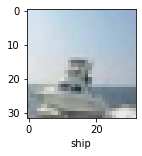

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

plot_sample(X_train, y_train, 100)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# Using ANN for image classification


ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 99s 63ms/step - loss: 1.8050 - sparse_categorical_accuracy: 0.3571
Epoch 2/5
1563/1563 [==============================] - 99s 63ms/step - loss: 1.6220 - sparse_categorical_accuracy: 0.4259
Epoch 3/5
1563/1563 [==============================] - 98s 63ms/step - loss: 1.5412 - sparse_categorical_accuracy: 0.4587
Epoch 4/5
1563/1563 [==============================] - 99s 63ms/step - loss: 1.4828 - sparse_categorical_accuracy: 0.4778
Epoch 5/5
1563/1563 [==============================] - 99s 63ms/step - loss: 1.4297 - sparse_categorical_accuracy: 0.4992


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.34      0.79      0.48      1000
           1       0.53      0.69      0.60      1000
           2       0.39      0.33      0.36      1000
           3       0.43      0.15      0.22      1000
           4       0.40      0.40      0.40      1000
           5       0.38      0.44      0.40      1000
           6       0.48      0.62      0.54      1000
           7       0.72      0.36      0.48      1000
           8       0.70      0.43      0.53      1000
           9       0.61      0.39      0.48      1000

    accuracy                           0.46     10000
   macro avg       0.50      0.46      0.45     10000
weighted avg       0.50      0.46      0.45     10000



In [ ]:
# Using CNN for image classification

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.5040 - accuracy: 0.4637
Epoch 2/10
1563/1563 [==============================] - 62s 40ms/step - loss: 1.1482 - accuracy: 0.5977
Epoch 3/10
1563/1563 [==============================] - 62s 40ms/step - loss: 1.0183 - accuracy: 0.6462
Epoch 4/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.9378 - accuracy: 0.6750
Epoch 5/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8809 - accuracy: 0.6947
Epoch 6/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8276 - accuracy: 0.7132
Epoch 7/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.7908 - accuracy: 0.7246
Epoch 8/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.7468 - accuracy: 0.7395
Epoch 9/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.7171 - accuracy: 0.7503
Epoch 10/10
1563/1563 [==============================] - 62s 40m

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))


Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.76      0.74      1000
           1       0.87      0.76      0.81      1000
           2       0.64      0.54      0.59      1000
           3       0.51      0.59      0.55      1000
           4       0.60      0.70      0.64      1000
           5       0.66      0.53      0.59      1000
           6       0.79      0.75      0.77      1000
           7       0.75      0.76      0.76      1000
           8       0.78      0.83      0.81      1000
           9       0.76      0.80      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000

